## Q1

### First, Load input data in form(x,y,z,x/y_perm,z_perm)

In [57]:
import xlrd
import math

x_perm = []
y_perm = []
z_perm = []

#load data for all cells
book = xlrd.open_workbook('data2.xlsx')
sheet = book.sheet_by_name('Sheet1')
data =[[sheet.cell_value(r,c) for c in range(2)] for r in range(60)]

for i in range(len(data)):
    y_perm.append(data[i][0])
    x_perm.append(data[i][0])
    z_perm.append(data[i][1])

### Then create cells list - which consists of a dictionary for each cell, {x,y,z,x_perm,y_perm, z_perm}

In [58]:
cells=[]

#create cell dictionaries
for z in range(1,4): 
    for y in range(1,5):
        for x in range(1,6):
            mydict = {}
            mydict['y']=y
            mydict['x']=x
            mydict['z']=z
            cells.append(mydict) 
            
#populate dictionaries with data

for i in range(len(cells)):

    cells[i]['y_perm']=y_perm[i]
    cells[i]['x_perm']=x_perm[i]
    cells[i]['z_perm']=z_perm[i]

### Example of the cells structure

In [59]:
print(cells[:10])

[{'z_perm': 5.0, 'y_perm': 50.0, 'y': 1, 'x': 1, 'z': 1, 'x_perm': 50.0}, {'z_perm': 6.0, 'y_perm': 60.0, 'y': 1, 'x': 2, 'z': 1, 'x_perm': 60.0}, {'z_perm': 7.0, 'y_perm': 70.0, 'y': 1, 'x': 3, 'z': 1, 'x_perm': 70.0}, {'z_perm': 8.0, 'y_perm': 80.0, 'y': 1, 'x': 4, 'z': 1, 'x_perm': 80.0}, {'z_perm': 10.0, 'y_perm': 100.0, 'y': 1, 'x': 5, 'z': 1, 'x_perm': 100.0}, {'z_perm': 5.5, 'y_perm': 55.0, 'y': 2, 'x': 1, 'z': 1, 'x_perm': 55.0}, {'z_perm': 6.5, 'y_perm': 65.0, 'y': 2, 'x': 2, 'z': 1, 'x_perm': 65.0}, {'z_perm': 4.5, 'y_perm': 45.0, 'y': 2, 'x': 3, 'z': 1, 'x_perm': 45.0}, {'z_perm': 3.5, 'y_perm': 35.0, 'y': 2, 'x': 4, 'z': 1, 'x_perm': 35.0}, {'z_perm': 15.0, 'y_perm': 150.0, 'y': 2, 'x': 5, 'z': 1, 'x_perm': 150.0}]


### Create method for airthmetic average of a list of cells or a list of values

In [60]:
def arithmetic(cells,k_to_avg):
    #it should take a list of cells or list of numbers and find the arithmetic average
    length = len(cells)
    if (type(cells[0])==dict):
        a = reduce(lambda x,y: x+y,(map(lambda x: x[k_to_avg] ,cells)))
    else:
        a = reduce(lambda x,y: x+y, map(lambda item: item ,cells))
        
    return(a/length)

### Create method for harmonic average of a list of cells or a list of values

In [61]:
def harmonic(cells,k_to_avg):
    #it should take a list of cells or list of values and find the harmonic average
    # used for flow perpendicular to layers
    length = len(cells)
    
    if (type(cells[0])==dict):
        a = reduce(lambda x,y: x+y, map(lambda item: 1/(item[k_to_avg]) ,cells))
    else:
        a = reduce(lambda x,y: x+y, map(lambda item: 1/(item) ,cells))
    
    return(length/a)

### Create method for geometric average of a list of cells or a list of values

In [62]:
def geometric(cells,k_to_avg):
    #it should take a list of cells and take the geometric average
    # used for flow paralell to layers
    length = len(cells)
    if(type(cells[0])==dict):
        a = reduce(lambda x,y: x*y,(map(lambda x: x[k_to_avg] ,cells)))
    else:
        a = reduce(lambda x,y: x*y,(map(lambda x: x ,cells)))
    return(a**(1.0/length))

### Calculate arithmetic averages for Kx, Ky and Kz

In [63]:
print 'x perm: %f' %(arithmetic(cells,'x_perm'))
print'y perm: %f'%(arithmetic(cells,'y_perm'))
print'z perm: %f'%(arithmetic(cells,'z_perm'))

x perm: 141.133333
y perm: 141.133333
z perm: 4.781667


### Calculate harmonic averages for Kx, Ky and Kz

In [64]:
print 'x perm: %f' %(harmonic(cells,'x_perm'))
print'y perm: %f'%(harmonic(cells,'y_perm'))
print'z perm: %f'%(harmonic(cells,'z_perm'))

x perm: 92.012156
y perm: 92.012156
z perm: 2.148953


### Calculate geometric averages for Kx, Ky and Kz

In [65]:
print 'x perm: %f' %(geometric(cells,'x_perm'))
print'y perm: %f'%(geometric(cells,'y_perm'))
print'z perm: %f'%(geometric(cells,'z_perm'))

x perm: 112.010351
y perm: 112.010351
z perm: 3.041898


### Define the Carswell and Parsons Upper bound function
Calculating the upper bound requires the harmonic meam of the arithmetic means of the local permeabilities calculated over each slice of cells perpendicular to the given flow direction. 
For this, we use three loops to slice over the volume in different directions, depending on the flow direction

In [66]:
def carswell_upper(cells,k_to_avg,dim1,dim2,dim3):
    #dim1 is the fastest cycling dimension, then dim2 then dim3
    values = []
    results = []
    
    #find max dimensions of all dimensions supplied
    d1_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim1] ,cells))
    d2_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim2] ,cells))
    d3_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim3] ,cells))
   
    for i in range(1,d3_max+1):
        for j in range(1,d2_max+1):
            for k in range(1,d1_max+1):
                #find cells that meet the current step
                values.append(filter(lambda cell: cell[dim3]== i and cell[dim2]==j and cell[dim1]==k,cells)[0])
        
        #calculate arithmetic mean of values collected at end of dim1 and dim2 cycles
        harms = arithmetic(map(lambda x: x,values),k_to_avg)
            
        #clear the temporary array and save the harmonic means
        values =[]
        results.append(harms)
    #calculate and return the harmonic mean of harmonic means
    return(harmonic(results,k_to_avg))

### Define Carswell and Parsons lower bounds function
Calculating the lower bounds requires the arithmetic mean of the harmonic means of the local permeabilites calculated on each cell slice paralell to the given flow direction. In this case, we calculate the harmonic mean after looping over two dimensions as there are two dimensions which are paralell to a given flow direction

In [67]:
def carswell_lower(cells,k_to_avg,dim1,dim2,dim3):
    #dim1 is the fastest cycling dimension, then dim2 then dim3
    values = []
    results = []
    
    #find max dimensions of all dims
    d1_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim1] ,cells))
    d2_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim2] ,cells))
    d3_max = reduce(lambda x,y: x if x>y else y,map(lambda x: x[dim3] ,cells))
   
    for i in range(1,d3_max+1):
        for j in range(1,d2_max+1):
            for k in range(1,d1_max+1):
                #find cells that meet the current step
                values.append(filter(lambda cell: cell[dim3]== i and cell[dim2]==j and cell[dim1]==k,cells)[0])
            
            #calculate harmonic mean of values collected at end of cycle in dim1
            harms = harmonic(map(lambda x: x,values),k_to_avg)
            #clear the temporary array and save the harmonic means
            values =[]
            results.append(harms)
    #calculate and return the arithmetic mean of the harmonic means
    return(arithmetic(results,k_to_avg))

### Calculate upper carswell and parsons bounds

In [68]:
print 'Cardwell upper x perm: %f' %(carswell_upper(cells,'x_perm','y','z','x'))
print 'Cardwell upper y perm: %f' %(carswell_upper(cells,'y_perm','x','z','y'))
print 'Cardwell upper z perm: %f' %(carswell_upper(cells,'z_perm','x','y','z'))

Cardwell upper x perm: 128.642205
Cardwell upper y perm: 125.917253
Cardwell upper z perm: 2.838820


### Calculate lower carswell and parsons bounds

In [69]:
print 'Cardwell lower x perm: %f' % (carswell_lower(cells,'x_perm','x','y','z'))
print 'Cardwell lower y perm: %f' %(carswell_lower(cells,'y_perm','y','x','z'))
print 'Cardwell lower x perm: %f' %(carswell_lower(cells,'z_perm','z','x','y'))

Cardwell lower x perm: 119.045515
Cardwell lower y perm: 120.164956
Cardwell lower x perm: 2.797921


### Calculate cardwell and parsons estimates

In [70]:
print 'x perm estimate: %f'%(math.sqrt(carswell_upper(cells,'x_perm','y','z','x')*carswell_lower(cells,'x_perm','x','y','z')))
print 'y perm estimate: %f' %(math.sqrt(carswell_upper(cells,'y_perm','x','z','y')*carswell_lower(cells,'y_perm','y','x','z')))
print 'z perm estimate: %f' %(math.sqrt(carswell_upper(cells,'z_perm','x','y','z')*carswell_lower(cells,'z_perm','z','x','y')))

x perm estimate: 123.750869
y perm estimate: 123.007484
z perm estimate: 2.818296


### Define Weiner upper bound (Kx, Ky, Kz) as Arithmetic mean

In [71]:
print 'Weiner upper bound x perm: %f' %(arithmetic(cells,'x_perm'))
print 'Weiner upper bound y perm: %f' %(arithmetic(cells,'y_perm'))
print 'Weiner upper bound z perm %f' %(arithmetic(cells,'z_perm'))

Weiner upper bound x perm: 141.133333
Weiner upper bound y perm: 141.133333
Weiner upper bound z perm 4.781667


### Define Weinter lower bounds (Kx,Ky,Kz) as Harmonic means

In [72]:
print 'Weiner upper bound x perm: %f' %(harmonic(cells,'x_perm'))
print 'Weiner upper bound y perm: %f' %(harmonic(cells,'y_perm'))
print 'Weiner upper bound z perm %f' %(harmonic(cells,'z_perm'))

Weiner upper bound x perm: 92.012156
Weiner upper bound y perm: 92.012156
Weiner upper bound z perm 2.148953


## Q2

### Replace all values of z=2 with 0

In [73]:
for cell in cells:
    if (cell['z']==2):
        #apprximate 0
        cell['z_perm']=1e-10


### Calculate arithmetic average

In [82]:
print 'x perm: %f' %(arithmetic(cells,'x_perm'))
print'y perm: %f'%(arithmetic(cells,'y_perm'))
print'z perm: %f'%(arithmetic(cells,'z_perm'))
data['x_perm_U']= arithmetic(cells,'x_perm')

x perm: 141.133333
y perm: 141.133333
z perm: 4.033333


### Calculate harmonic averages for Kx, Ky and Kz

In [83]:
print 'x perm: %f' %(harmonic(cells,'x_perm'))
print'y perm: %f'%(harmonic(cells,'y_perm'))
print'z perm: %f'%(harmonic(cells,'z_perm'))
data['x_perm_L']= harmonic(cells,'x_perm')

x perm: 92.012156
y perm: 92.012156
z perm: 0.000000


### Calculate geometric averages for Kx, Ky and Kz

In [76]:
print 'x perm: %f' %(geometric(cells,'x_perm'))
print'y perm: %f'%(geometric(cells,'y_perm'))
print'z perm: %f'%(geometric(cells,'z_perm'))

x perm: 112.010351
y perm: 112.010351
z perm: 0.001135


### Calculate cardwell and parsons upper bounds

In [84]:
data['x_perm_Uc']= (carswell_upper(cells,'x_perm','y','z','x'))
print 'Cardwell upper x perm: %f' %(carswell_upper(cells,'x_perm','y','z','x'))
print 'Cardwell upper y perm: %f' %(carswell_upper(cells,'y_perm','x','z','y'))
print 'Cardwell upper z perm: %f' %(carswell_upper(cells,'z_perm','x','y','z'))

Cardwell upper x perm: 128.642205
Cardwell upper y perm: 125.917253
Cardwell upper z perm: 0.000000


### Calculate lower carswell and parsons bounds

In [85]:
data['x_perm_Lc']= (carswell_lower(cells,'x_perm','x','y','z'))
print 'Cardwell lower x perm: %f' % (carswell_lower(cells,'x_perm','x','y','z'))
print 'Cardwell lower y perm: %f' %(carswell_lower(cells,'y_perm','y','x','z'))
print 'Cardwell lower x perm: %f' %(carswell_lower(cells,'z_perm','z','x','y'))

Cardwell lower x perm: 119.045515
Cardwell lower y perm: 120.164956
Cardwell lower x perm: 0.000000


### Calculate cardwell and parsons estimates

In [86]:
data['x_perm_e']= (math.sqrt(carswell_upper(cells,'x_perm','y','z','x')*carswell_lower(cells,'x_perm','x','y','z')))
print 'x perm estimate: %f'%(math.sqrt(carswell_upper(cells,'x_perm','y','z','x')*carswell_lower(cells,'x_perm','x','y','z')))
print 'y perm estimate: %f' %(math.sqrt(carswell_upper(cells,'y_perm','x','z','y')*carswell_lower(cells,'y_perm','y','x','z')))
print 'z perm estimate: %f' %(math.sqrt(carswell_upper(cells,'z_perm','x','y','z')*carswell_lower(cells,'z_perm','z','x','y')))

x perm estimate: 123.750869
y perm estimate: 123.007484
z perm estimate: 0.000000


### Define Weiner upper bound (Kx, Ky, Kz) as Arithmetic mean

In [80]:
print 'Weiner upper bound x perm: %f' %(arithmetic(cells,'x_perm'))
print 'Weiner upper bound y perm: %f' %(arithmetic(cells,'y_perm'))
print 'Weiner upper bound z perm %f' %(arithmetic(cells,'z_perm'))

Weiner upper bound x perm: 141.133333
Weiner upper bound y perm: 141.133333
Weiner upper bound z perm 4.033333


### Define Weinter lower bounds (Kx,Ky,Kz) as Harmonic means

In [30]:
print 'Weiner upper bound x perm: %f' %(harmonic(cells,'x_perm'))
print 'Weiner upper bound y perm: %f' %(harmonic(cells,'y_perm'))
print 'Weiner upper bound z perm %f' %(harmonic(cells,'z_perm'))

Weiner upper bound x perm: 92.012156
Weiner upper bound y perm: 92.012156
Weiner upper bound z perm 0.000000


In [321]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

data_to_plot = [data['x_perm_L'],data['x_perm_U']]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
med = [data['x_perm_Lc'],data['x_perm_Uc']]
print(med)
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,vert=False,usermedians=[data['x_perm_e']])





for whisker in bp['whiskers']:
    whisker.set(color='b', linewidth=3)
plt.xlim([80,150])

#bp['boxes'][0].set_xdata([110])
q2_start=data['x_perm_Lc']
q4_start=data['x_perm_Uc']

path = bp['boxes'][0].get_path()
path.vertices[0][0] = q2_start
path.vertices[1][0] = q2_start
path.vertices[2][0] = q4_start
path.vertices[3][0] = q4_start
path.vertices[4][0] = q2_start

bp['boxes'][0].set(linewidth=2)
for cap in bp['caps']:
    cap.set(linewidth=2.5)
plt.xlabel('Permeability, mD')
ax.grid(True, which='both')

ax.set_yticklabels([])

plt.title('Range of permeabilites calculated with various upscaling techniques')
    
bp['whiskers'][0].set_xdata([data['x_perm_L'], data['x_perm_Lc']])

plt.annotate('Harmonic mean',xy=(data['x_perm_L'],1),xytext=(data['x_perm_L'],0.88),horizontalalignment='center')
plt.annotate('Arithmetic mean',xy=(data['x_perm_U'],1),xytext=(data['x_perm_U'],0.88),horizontalalignment='center')

plt.annotate('C & P \nupper bound',xy=(data['x_perm_Uc'],1),xytext=(data['x_perm_Uc'],0.84),horizontalalignment='center')
plt.annotate('C & P \nlower bound',xy=(data['x_perm_Lc'],1),xytext=(data['x_perm_Lc'],0.84),horizontalalignment='center')
plt.annotate('C & P \nEstimate',xy=(data['x_perm_e'],1),xytext=(data['x_perm_e'],1.1),horizontalalignment='center',weight='bold')

plt.savefig('graph.png',dpi=400)

[119.04551494336799, 128.64220482551403]


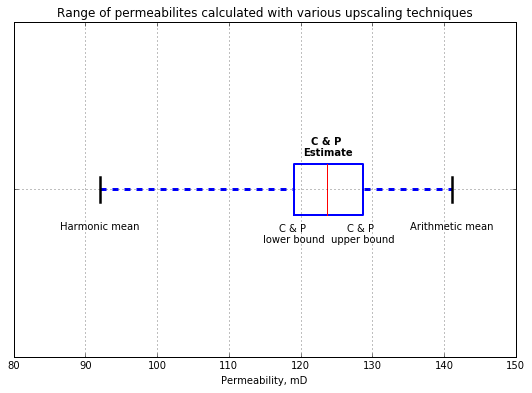

In [320]:
plt.show()

In [96]:
print([data['x_perm_L'],data['x_perm_Lc'],data['x_perm_e'],data['x_perm_Uc'],data['x_perm_U']])

[92.0121562709799, 119.04551494336799, 123.75086875211639, 128.64220482551403, 141.13333333333333]


In [151]:
print(bp['boxes'][0])

Line2D(_line0)


In [204]:
def get_percentiles_from_box_plots(bp):
    percentiles = []
    for i in range(len(bp['boxes'])):
        percentiles.append(bp['caps'][2*i].get_ydata()[0],
                           bp['boxes'][i].get_ydata()[0],
                           bp['medians'][i].get_ydata()[0],
                           bp['boxes'][i].get_ydata()[2])
                    
                     
    return percentiles

In [205]:
get_percentiles_from_box_plots(bp)

TypeError: append() takes exactly one argument (4 given)